<a href="https://colab.research.google.com/github/Gklimo/IHC-BERT/blob/main/marker_performances_oc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score, precision_score,recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pr_all_rep = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/pr_all_rep_bert_descr_oc.csv')
pr_all_rep_true = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/Oment_Carcinoma.xlsx')

In [ ]:
pr_all_rep=pr_all_rep.sort_values('specnum_formatted', ascending = True).reset_index().drop(['index'], axis=1)
pr_all_rep_true=pr_all_rep_true.sort_values('specnum_formatted', ascending = True).reset_index().drop(['index'], axis=1)

In [ ]:
pr_all_rep = pr_all_rep.rename(columns = {'PROGESTERONERECEPTOR':'PR'})
pr_all_rep_true = pr_all_rep_true.rename(columns = {'PA38':'PAX8'})

In [ ]:
pr_all_rep.columns

Index(['Unnamed: 0', 'specnum_formatted', 'Tokens', 'Labels', 'full_text',
       'CK7', 'CK20', 'BEREP4', 'P53', 'WT1', 'P16', 'CA125', 'PAX8', 'TTF',
       'CEA', 'PAX', 'CYTOKERATIN7', 'CK', ',', 'AE1', 'GATA3', 'CDX2', 'WT',
       'PR', 'NAPSIN'],
      dtype='object')

In [ ]:
tru_cols = list(pr_all_rep_true.columns)
bert_cols = list(pr_all_rep.columns)

In [ ]:
del bert_cols[0]
del bert_cols[0]
del bert_cols[0]
del bert_cols[0]
del bert_cols[0]

In [ ]:
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]
del tru_cols[0]

In [ ]:
pr_all_rep = pr_all_rep.replace({0:'NEGATIVE',1:'POSITIVE',3:'NONE'})
pr_all_rep_true = pr_all_rep_true.replace({0:'NEGATIVE',1:'POSITIVE',3:'NONE'})

In [ ]:
r = ['UH17-24401','UH17-6680','UH17-7900','UH17-9301']
for i in r:
  pr_all_rep=pr_all_rep[pr_all_rep['specnum_formatted']!=i]
  pr_all_rep_true = pr_all_rep_true[pr_all_rep_true['specnum_formatted']!=i]

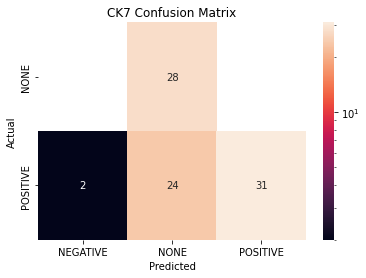

Performance metrics for CK7
Precision score: 0.51
Recall score: 0.51
f1 scre: 0.47



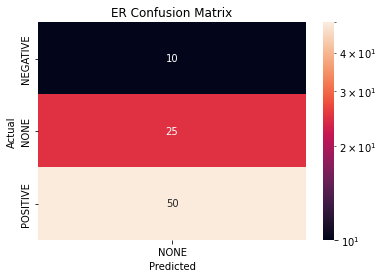

Performance metrics for ER
Precision score: 0.10
Recall score: 0.33
f1 scre: 0.15



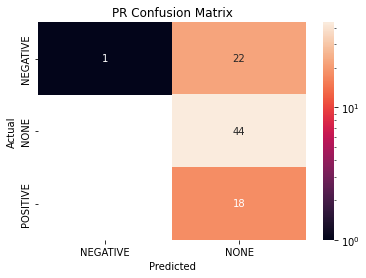

Performance metrics for PR
Precision score: 0.51
Recall score: 0.35
f1 scre: 0.26



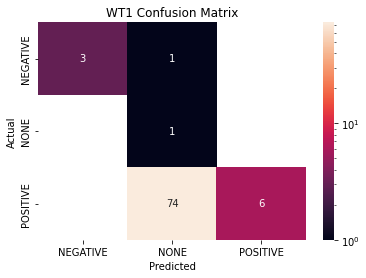

Performance metrics for WT1
Precision score: 0.67
Recall score: 0.61
f1 scre: 0.34



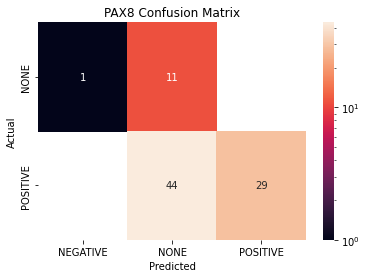

Performance metrics for PAX8
Precision score: 0.40
Recall score: 0.44
f1 scre: 0.30



In [ ]:
results = pd.DataFrame(columns = ['Marker','Macro Precision','Macro Recall', 'Macro F1','Positive Precision','Positive Recall', 'Positive F1','Negative Precision','Negative Recall', 'Negative F1'])


for b in tru_cols:


    confusion_matrix = pd.crosstab(pr_all_rep_true[b], pr_all_rep[b],rownames=['Actual'], colnames=['Predicted'])
    #print (confusion_matrix)
    sn.heatmap(confusion_matrix, annot=True,norm=LogNorm())
    plt.title(str(b)+' Confusion Matrix')
    plt.show()

    print(f'Performance metrics for {b}')
    precision = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE','NEGATIVE','NONE']) 
    precision1 = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    precision2 = precision_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('Precision score: {0:0.2f}'.format(precision))
    #print('Precision score: {0:0.2f}'.format(precision1))
    #print('Precision score: {0:0.2f}'.format(precision))

    recall = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE','NEGATIVE','NONE'])
    recall1 = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    recall2 = recall_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('Recall score: {0:0.2f}'.format(recall))

    f1 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE','NEGATIVE','NONE'])
    f11 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['NEGATIVE'])
    f12 = f1_score(pr_all_rep_true[b],pr_all_rep[b], zero_division=0,average='macro',labels=['POSITIVE'])
    print('f1 scre: {0:0.2f}\n'.format(f1))
    df = pd.DataFrame({'Marker': [b],'Macro Precision' : [precision],'Macro Recall':[recall], 'Macro F1': [f1],\
                       'Positive Precision' : [precision2],'Positive Recall':[recall2], 'Positive F1': [f12],\
                       'Negative Precision' : [precision1],'Negative Recall':[recall1], 'Negative F1': [f11]})
    results = results.append(df)


In [ ]:
results.sort_values('Macro F1', ascending = False).head(50)
results.to_csv('/content/drive/MyDrive/Colab_Notebooks/MSc_BERT/IHC_BERT/Fine-tuning/marker_res_oc.csv')

In [ ]:
results.sort_values('Macro F1', ascending = False).head(50)

,Marker,Macro Precision,Macro Recall,Macro F1,Positive Precision,Positive Recall,Positive F1,Negative Precision,Negative Recall,Negative F1
0,CK7,0.503030,0.508772,0.454785,1.0,0.526316,0.689655,0.0,0.000000,0.000000
0,WT1,0.670996,0.525000,0.277281,1.0,0.075000,0.139535,1.0,0.500000,0.666667
0,PAX8,0.394444,0.415145,0.266800,1.0,0.328767,0.494845,0.0,0.000000,0.000000
0,PR,0.507937,0.347826,0.256944,0.0,0.000000,0.000000,1.0,0.043478,0.083333


In [ ]:
all_counts = pd.DataFrame(columns = ['Status','Count'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep_true[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion|'])
  df['Marker'] = col
  print(df)
  all_counts = all_counts.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
  


     Status Proportion| Marker
0  POSITIVE    0.670588    CK7
1      NONE    0.329412    CK7
     Status Proportion| Marker
0  POSITIVE    0.588235     ER
1      NONE    0.294118     ER
2  NEGATIVE    0.117647     ER
     Status Proportion| Marker
0      NONE    0.517647     PR
1  NEGATIVE    0.270588     PR
2  POSITIVE    0.211765     PR
     Status Proportion| Marker
0  POSITIVE    0.941176    WT1
1  NEGATIVE    0.047059    WT1
2      NONE    0.011765    WT1
     Status Proportion| Marker
0  POSITIVE    0.858824   PAX8
1      NONE    0.141176   PAX8


In [ ]:
#get positive true
all_counts_b = pd.DataFrame(columns = ['Status','Proportion'])
for col in not_pax:
  
  df = pd.DataFrame(pr_all_rep[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts_b = all_counts_b.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
all_counts_b  


,Status,Proportion,Marker
0,POSITIVE,0.352941,CK7
1,POSITIVE,0.070588,WT1
2,POSITIVE,0.282353,PAX8


In [ ]:
#get negative true
all_counts_b = pd.DataFrame(columns = ['Status','Proportion'])
for col in not_pax:
  
  df = pd.DataFrame(pr_all_rep[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts_b = all_counts_b.append(df[df['Status']=='NEGATIVE']).reset_index(drop=True)
all_counts_b  


,Status,Proportion,Marker
0,NEGATIVE,0.011765,PR
1,NEGATIVE,0.023529,WT1
2,NEGATIVE,0.011765,PAX8


In [ ]:
#get positive proportions
all_counts = pd.DataFrame(columns = ['Status','Proportion'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep_true[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts = all_counts.append(df[df['Status']=='POSITIVE']).reset_index(drop=True)
all_counts  

,Status,Proportion,Marker
0,POSITIVE,0.670588,CK7
1,POSITIVE,0.588235,ER
2,POSITIVE,0.211765,PR
3,POSITIVE,0.941176,WT1
4,POSITIVE,0.858824,PAX8


In [ ]:
#get negative proportions
all_counts = pd.DataFrame(columns = ['Status','Proportion'])
for col in tru_cols:
  
  df = pd.DataFrame(pr_all_rep_true[col].value_counts(normalize = True).reset_index().values, columns = ['Status','Proportion'])
  df['Marker'] = col

  all_counts = all_counts.append(df[df['Status']=='NEGATIVE']).reset_index(drop=True)
all_counts  

,Status,Proportion,Marker
0,NEGATIVE,0.117647,ER
1,NEGATIVE,0.270588,PR
2,NEGATIVE,0.047059,WT1
